# Session 5 - Logistic Regression

### Let us consider a simple case where the outcome is qualitative

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Import the Default.csv data set
df=pd.read_csv('Default.csv')
## your code here ##

It looks like our dataset is read properly and that we have two binary data. Let'us check it anyway...

In [3]:
## your code here ##

In [4]:
## your code here ##

In [44]:
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

- `default` is a highly imbalanced dataset
- `student` is also quite imbalanced, but not as much

# *Part I - Descriptive & Exploratory Statistics*

### Inquiry
Does it make a better sense to predict "defaulting" from "one's credit" or "being a student" ? <br>
From a theoretical perspective, it makes a better sense to predict 'default' given one's income, balance or student status. <br>
One would certainly be more likely to default being a student, in the US, especially if the credit balance is higher... <br>
But can we make a statistical case from this ?

### *Step 1 - So let us first check the relationship between `default` and the other variables*

In [5]:
# Contigency Table between the two binary variables

df_obs = ## your code here ##

SyntaxError: invalid syntax (470066687.py, line 3)

In [6]:
df_obs=pd.crosstab(df['student'],df['default'])
df_obs

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [7]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(df_obs)
p_value

0.0004997256756210486

### Reminder : chi square test of independence

$$H_0 : \text{The two variables are independent (they vary independently of each other)}$$
$$H_1 : \text{The two variables are not independent (their variations are linked)}$$
$$ \text{If the p-value is greater than }  \alpha = 0.05, \text{then reject } H_0 \text{ and conclude that the two variables are linked}$$

In [8]:
p_value

0.0004997256756210486

**Thus, the two variables are linked, but what is the nature of the link ?**

In [9]:
df_exp = ## your code here ##

SyntaxError: invalid syntax (612794013.py, line 1)

In [10]:
df_exp=pd.DataFrame(expected,index=df_obs.index,columns=df_obs.columns)
df_exp

default,No,Yes
student,,
No,6821.0352,234.9648
Yes,2845.9648,98.0352


In [11]:
df_res = ## your code here ##

SyntaxError: invalid syntax (2788345142.py, line 1)

In [12]:
df_res=(df_obs-df_exp)/np.sqrt(df_exp)
df_res

default,No,Yes
student,,
No,0.350708,-1.889597
Yes,-0.542945,2.925361


**As we see there is significantly more defaulting amongst the students.
Can we show this graphically ?**

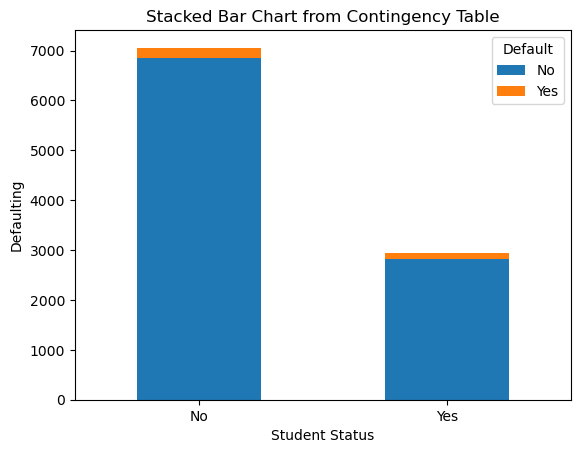

In [13]:
# stacked bar chart
import matplotlib.pyplot as plt

df_obs.plot(kind='bar', stacked=True)
plt.xlabel('Student Status')
plt.ylabel('Defaulting')
plt.title('Stacked Bar Chart from Contingency Table')
plt.legend(title='Default')
plt.xticks(rotation=0)
plt.show()

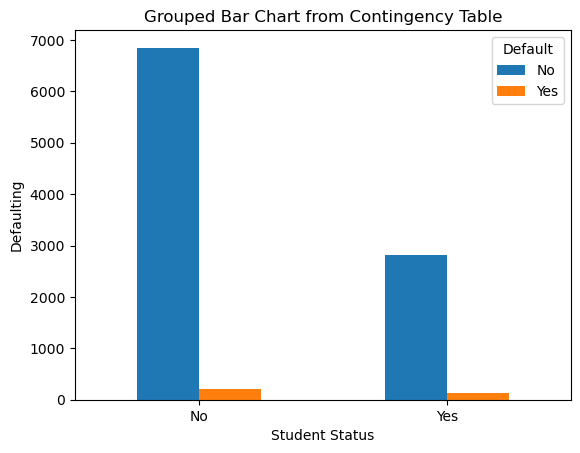

In [14]:
# grouped bar chart
df_obs.plot(kind='bar')
plt.xlabel('Student Status')
plt.ylabel('Defaulting')
plt.title('Grouped Bar Chart from Contingency Table')
plt.legend(title='Default')
plt.xticks(rotation=0)
plt.show()

### *Step 2 - Let us examine the link between `default` and the the two quantitative variables*
This basically amounts to compare the means between the two categories of `default` on these two variables <br>
Are these difference significant ?

### Reminder : comparing means (anova)

$$H_0 : \text{The values of the quantitative variables are identical (equivalent) in the categories}$$
$$H_1 : \text{The values of the quantitative variables are different between  the categories)}$$
$$ \text{If the p-value is smaller than }  \alpha = 0.05, \text{then reject } H_0 \text{ and conclude that the there is at least one category for which the (average) values are different from another}$$

In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [16]:
model_income = ols('income ~ default', data = df).fit()
anova_income = anova_lm(model_income)
display(anova_income)

,df,sum_sq,mean_sq,F,PR(>F)
default,1.0,7.022769e+08,7.022769e+08,3.949514,0.046912
Residual,9998.0,1.777779e+12,1.778135e+08,NaN,NaN


In [17]:
# then compute the difference in mean
income_yes = df.loc[df['default']=='Yes','income']
income_no = df.loc[df['default']=='No','income']
income_diff = income_yes.mean() - income_no.mean()
print(income_diff)

-1477.0195008815717


In [18]:
df['income'].describe()

count    10000.000000
mean     33516.981876
std      13336.639563
min        771.967729
25%      21340.462903
50%      34552.644802
75%      43807.729272
max      73554.233495
Name: income, dtype: float64

So the average income is 1477 USD higher for those who do not default - which makes sense <br>
But is this difference meaningful ?

Well, 1477 is rather small compared to the standard deviation of approximately 13337 USD with a mean of 33517 USD <br>
To understand how meaningful this is, we need actually to compute what is called a, 'effect size' such as Cohen's d

Cohen's d is calculated as:

$$\left[
d = \frac{{\mu_1 - \mu_2}}{{\sqrt{\frac{{(n_1 - 1) \cdot \sigma_1^2 + (n_2 - 1) \cdot \sigma_2^2}}{{n_1 + n_2 - 2}}}}}
\right]$$

where:
$$\begin{align*}
\mu_1 & = \text{mean of group 1} \\
\mu_2 & = \text{mean of group 2} \\
\sigma_1 & = \text{standard deviation of group 1} \\
\sigma_2 & = \text{standard deviation of group 2} \\
n_1 & = \text{sample size of group 1} \\
n_2 & = \text{sample size of group 2}
\end{align*}$$

The effect size are as following:
$$\begin{align*}
|d| &= 0.01 & : \quad & \text{Very Small (Negligible)} \\
|d| &= 0.20 & : \quad & \text{Small} \\
|d| &= 0.50 & : \quad & \text{Medium} \\
|d| &= 0.80 & : \quad & \text{Large} \\
|d| &= 1.20 & : \quad & \text{Very Large} \\
|d| &= 2.00 & : \quad & \text{Huge}
\end{align*}$$



In [19]:
std_yes = income_yes.std()
std_no = income_no.std()

# Calculate Cohen's d
n_yes = len(income_yes)
n_no = len(income_no)

# Pooled standard deviation
s_pooled = np.sqrt(((n_yes - 1) * std_yes**2 + (n_no - 1) * std_no**2) / (n_yes + n_no - 2))

# Cohen's d
cohens_d = income_diff / s_pooled

print(f"Income difference (Yes - No): {income_diff:.2f}")
print(f"Cohen's d: {cohens_d:.4f}")

Income difference (Yes - No): -1477.02
Cohen's d: -0.1108


In [ ]:
# compute and print Cohen's d comparing the income of the defaulting and the non defaulting
## your code here ##

This is a rather low effect size...

In [20]:
model_balance = ols('balance ~ default', data = df).fit()
anova_balance = anova_lm(model_income)
display(anova_balance)

,df,sum_sq,mean_sq,F,PR(>F)
default,1.0,7.022769e+08,7.022769e+08,3.949514,0.046912
Residual,9998.0,1.777779e+12,1.778135e+08,NaN,NaN


In [21]:
# then compute the difference in mean
balance_yes = df.groupby('default')['balance'].mean()[1]
balance_no = df.groupby('default')['balance'].mean()[0]
balance_diff = balance_yes-balance_no
print(balance_diff)

943.8779393804389


In [22]:
balance_yes.mean()

1747.8216896116273

In [23]:
balance_no

803.9437502311885

In [ ]:
## your code here ##

In [ ]:
# compute and print Cohen's d comparing the balance of the defaulting and the non defaulting

## your code here ##

In [24]:
df.groupby('default')['balance'].mean()

default
No      803.94375
Yes    1747.82169
Name: balance, dtype: float64

In [25]:
std_yes = df.groupby('default')['balance'].std()[1]
std_no =  df.groupby('default')['balance'].std()[0]

# Calculate Cohen's d
n_yes = len(df[df["default"]=="yes"])
n_no = len(df[df["default"]=="no"])

# Pooled standard deviation
s_pooled = np.sqrt(((n_yes - 1) * std_yes**2 + (n_no - 1) * std_no**2) / (n_yes + n_no - 2))

# Cohen's d
cohens_d = balance_diff / s_pooled

print(f"Income difference (Yes - No): {balance_diff:.2f}")
print(f"Cohen's d: {cohens_d:.4f}")

Income difference (Yes - No): 943.88
Cohen's d: 2.3421


As we can see here, the credit balance is higher for those who default and the effect size it 20 times more important

### Let us check this with a different method

Use an independent T-test approach with integrated effect size, using pingouin package

In [ ]:
!pip install pingouin

In [28]:
# For income

import pingouin as pg
t_income = pg.ttest( df.loc[df['default']=='Yes','balance'], df.loc[df['default']=='No','balance'], paired=False)
display(t_income)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,48.984317,374.135389,two-sided,7.847829e-165,"[905.99, 981.77]",2.083059,inf,1.0


In [20]:
# For balance

## your code here ##

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,48.984317,374.135389,two-sided,7.847829e-165,"[905.99, 981.77]",2.083059,inf,1.0


The results are close, however the formula used are not exactely the same - see [here](https://pingouin-stats.org/build/html/generated/pingouin.ttest.html) for the computation used in `pingouin`

**It is thus clear that the difference in `balance` between the defaulting and non defaulting samples is much stronger than it is in `income`**

Now, can we show it graphically ?

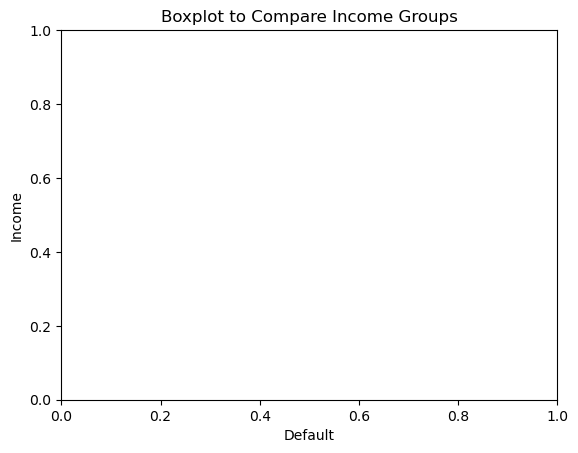

In [29]:
import seaborn as sns
sns.boxplot(x)
# Create a boxplot using Seaborn
## your code here ##
plt.xlabel('Default')
plt.ylabel('Income')
plt.title('Boxplot to Compare Income Groups')
plt.show()

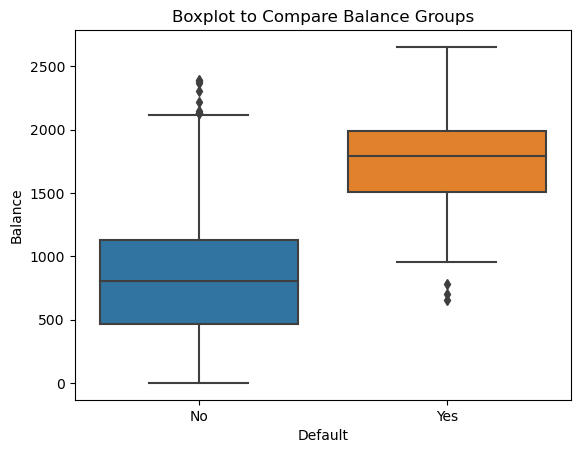

In [26]:
# Create a boxplot using Seaborn

## your code here ##

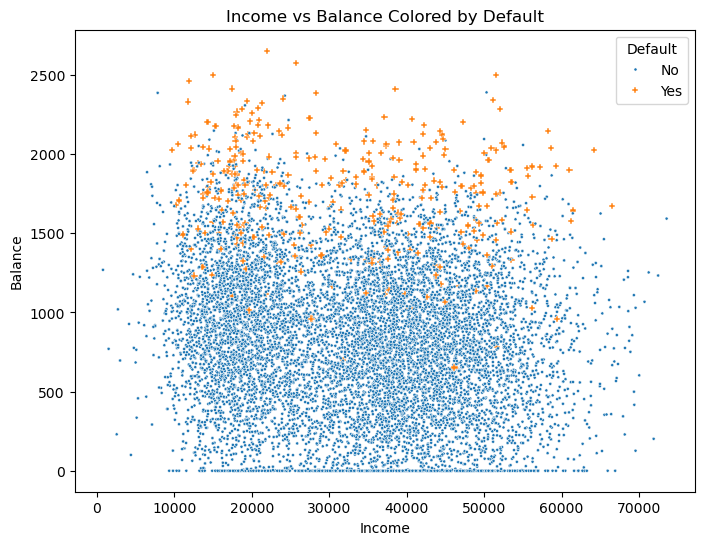

In [30]:
# Scatter plot of Income and Balanced, as regrouped by default
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='income', y='balance', hue='default', style='default', markers={"No":'.',"Yes":'P'}, s=20)
plt.title('Income vs Balance Colored by Default')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.legend(title='Default')
plt.show()

### Conclusion

These preliminary analyses demonstrates that it is relevant and meaningful to consider `default` as an appropriate outcome variable.

Clearly `balance` discriminates `default` much better than `income`, but we can already see but a linear classifier based only on these two variables is not going to be very good in discriminating the defaulting from the non defaulting individuals.<br>
We should expect however that accounting for the `student` status should make a difference.

Let us then consider predicting `default`, given the dataset

# *Part 2 - Logistic Regression Modeling*

First, we are to going to use scikit learn for Logistic Regression.<br> Scikit Learn uses Ridge Penalized Logistic Regression per default.<br> So to work with the traditional non penalized models we need to instantiate it as following.<br>
Be careful, [the choice of the solver is paramount - see 1.1.11.3. Solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty=None, solver='newton-cholesky')

In [32]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


If we tried to fit the model as it is, it would not work because one of the predictor is not numerical

The following lines of code : <br>
- `X = df.drop(columns=['default'])`
- `y = df['default']`
- `logreg.fit(X,y)`

Will give the following error : `ValueError: could not convert string to float: 'No'`

So, we need first to categorize the `student` variable.


#### Start with one hot encoding keeping all modalities of categorical variables

In [45]:
df['default']=df['default'].apply(lambda x: 1 if x == "Yes" else 0)
df['student']=df['student'].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [46]:
df['default'].value_counts()

default
0    9667
1     333
Name: count, dtype: int64

In [47]:
X = df.drop(columns=['default'])
y = df['default']

In [48]:
# check
X.info()
display(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   student  10000 non-null  int64  
 1   balance  10000 non-null  float64
 2   income   10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879


In [49]:
# fit the logistic regression model #
logreg.fit(X,y)
## your code here ##

LogisticRegression(penalty=None, solver='newton-cholesky')

In [50]:
coef = logreg.coef_
coef

array([[-6.46775700e-01,  5.73650460e-03,  3.03345048e-06]])

In [51]:
OR = np.exp(coef)
OR

array([[0.52373173, 1.00575299, 1.00000303]])

#### Now check with a different package

In [52]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.Logit(y, X)

res = model.fit(maxiter=100, cov_type="HC3")

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [53]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.4619
Time:                        17:09:39   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:                  HC3   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.072      0.000     -11.834      -9.904
student       -0.6468      0.242     -2.671      0.008      -1.121      -0.172
balance        0.0057      0.000     24.772      0.000       0.005       0.006
income      3.033e-06   8.35e-06      0.363      0.716   -1.33e-05    1.94e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [184]:
res.summary()

C:\Users\Franck\.conda\envs\machine_learning\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Franck\.conda\envs\machine_learning\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Aug 2023   Pseudo R-squ.:                     inf
Time:                        18:39:12   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:                  HC3   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.4616   6.09e+05  -1.23e-05      1.000   -1.19e+06    1.19e+06
balance         0.0057      0.000     24.750      0.000       0.005       0.006
income       3.033e-06   8.35e-06      0.363      0.716   -1.33e-05    1.94e-05
student_No     -3.4074   4.97e+05  -6.85e-06      1.000   -9.74e+05    9.74e+05
student_Yes    -4.0542   5.21e+05  -7.78e-06      1.000   -1.02e+06    1.02e+06
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### <span style="color:blue"> Exercise 1 : give an intepretation of these coefficients </span>

#### Then again with dropping the first category of the categorical variable

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty=None, solver='newton-cholesky')

In [37]:
X = ## your code here ##
y = ## your code here ##

In [187]:
# check
X.info()
display(X.head())
y.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      10000 non-null  float64
 1   income       10000 non-null  float64
 2   student_Yes  10000 non-null  uint8  
dtypes: float64(2), uint8(1)
memory usage: 166.1 KB


,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


Yes    333
dtype: int64

In [38]:
# fit the logistice regression model with scikit learn

## your code here ##

LogisticRegression(penalty=None, solver='newton-cholesky')

In [39]:
## your code here ##
coef

array([-1.08690441e+01,  5.73650460e-03,  3.03345048e-06, -6.46775700e-01])

In [40]:
OR = np.exp(coef)
OR

array([1.90385614e-05, 1.00575299e+00, 1.00000303e+00, 5.23731726e-01])

#### Now check with as different package

In [41]:
import statsmodels.api as sm
res = ## your code here ##

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                     inf
Time:                        18:05:24   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:                  HC3   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.8690      0.492    -22.072      0.000     -11.834      -9.904
balance         0.0057      0.000     24.772      0.000       0.005       0.006
income       3.033e-06   8.35e-06      0.363      0.716   -1.33e-05    1.94e-05
student_Yes    -0.6468      0.242     -2.671      0.008      -1.121      -0.172
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### <span style="color:blue"> Exercise 2 : give an intepretation of these coefficients </span>

### Discussion

#### 1. A difference in outputs & implication on explainability

We see that the scikit learn outputs do not provide the standard errors nor the p-values as ML does not make any assumptions on the probability distribution of the variables. <br>
Thus, it is not very helpful in terms of explainability since we do not know the amplitude of the statistics.<br>
Of course we may always standardize all the coefficients : it gives a good sense of the effect-size of each predictor.

On the other hand statstools output statistical tables with the values, the standard errors and the statistic of the test.
The statistic of the test provides a good indication on the variable importance

#### 2. The solver used is paramount

Scikit learn makes a choice to penalize per default. It is in fact a good thing in Machine Learning because it can handle the inflation of the coefficients when the standard error is very small, for example in case of collinearity.<br>
This is implemented on some types of solvers, better than on others.<br>
Some of these solver however are not appropriate to find exact and precise solutions, the kind of which we need in statistics. Thus when we want to compare with statistical packages, we must choose the solvers very carefully.

## *Part 3 - Model Performance*

To compute performance, we must have at least a training set and a validation set...

Or we may compute the performance using cross validation

Or better yet, we first set aside a test set, then compute performance on training and validation set, then check our final performance on the test set

In [54]:
# First determine the target and the features
X = pd.get_dummies(df.drop(columns=['default']))
y = df['default']

In [55]:
# Check
display(X.head(),y.head())

,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [56]:
# With a simple training and validation set
from sklearn.model_selection import train_test_split

# Partition (proportion og test set)
partition = 0.20

# Select a seed for the random splitting
seed = 42

# Split data into training and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=partition, random_state=seed, stratify=y)

In [57]:
# Import Linear Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty=None, solver='newton-cholesky')

In [58]:
# Fit model on training set
logreg.fit(X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cholesky')

In [59]:
# Validation performance
logreg.score(X_valid, y_valid)

0.9725

In [60]:
# Crossvalidated performance
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(logreg, X_valid, y_valid)
print(f"cross validated score :{cv_score} - average cross validate score :{np.mean(cv_score)}")

cross validated score :[0.97   0.975  0.975  0.9675 0.97  ] - average cross validate score :0.9715


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.70      0.31      0.43        67

    accuracy                           0.97      2000
   macro avg       0.84      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



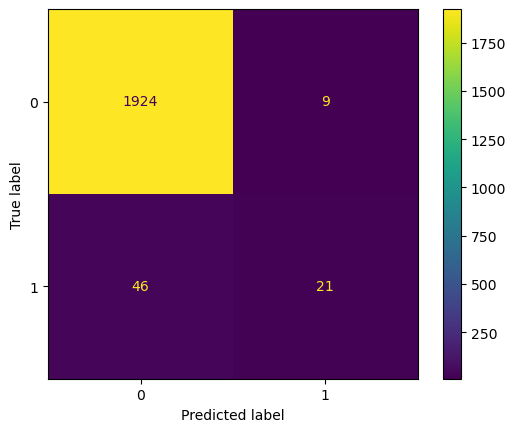

In [61]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = logreg.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred, labels=logreg.classes_)
ConfusionMatrixDisplay(cm, display_labels=logreg.classes_).plot()
print(classification_report(y_valid, y_pred))

$$ \text{Macro Average : } \left(0.84 = \frac {0.98+0.70}{2}\right)\left(0.65 = \frac{1.00+0.31}{2}\right) \left(0.71 = \frac{0.99+0.43}{2}\right)$$
$$ \text{Weighted Average : }\left(0.97 = \frac {1933*0.98+67*0.70}{2000}\right)\left(0.98 = \frac{1933*1.00+67*0.31}{2000}\right)\left(0.97 = \frac{1933*0.99+67*0.43}{2000}\right) $$ 